In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import seaborn as sns

## Слоноблок

In [2]:
size   = [1.5, 3.1, 4.5, 2.5, 2.7, 3.2, 4.3, 4.1, 
          3.5, 4.2, 2.4, 1.7, 1.3, 1.6, 2.7, 2.4]
color  = ['blue', 'orange', 'orange', 'blue', 'yellow', 'orange', 'orange', 'orange', 
          'grey', 'grey', 'blue', 'yellow', 'yellow', 'blue', 'yellow', 'yellow']
target = [1, 0, 0, 0, 1, 0, 0, 0, 
          0, 1, 0, 0, 0, 1, 1, 1]

elephant_data = pd.DataFrame({
    'size': size,
    'color': color,
    'target': target
})
elephant_data

,size,color,target
0,1.5,blue,1
1,3.1,orange,0
2,4.5,orange,0
3,2.5,blue,0
4,2.7,yellow,1
5,3.2,orange,0
6,4.3,orange,0
7,4.1,orange,0
8,3.5,grey,0
9,4.2,grey,1


In [3]:
def entropy(data):
    N = len(data)
    if N == 0: return 0
    classes = elephant_data['target'].unique()
    S = 0
    for target_class in classes:
        N_i = len(data[data['target'] == target_class])
        if N_i == N: return 0
        p = N_i / N
        if N_i != 0:
            S += p * math.log2(p)
        else:
            S += 0
    return -S

In [4]:
def weighted_entropy(separations):
    total_count = sum([len(separation) for separation in separations])
    return sum([len(separation) * entropy(separation) / total_count for separation in separations])

In [5]:
entropy(elephant_data) - weighted_entropy([
    elephant_data[elephant_data['color'] == 'orange'], 
    elephant_data[elephant_data['color'] != 'orange']
])

0.2710382325345575

In [6]:
entropy(elephant_data) - weighted_entropy([
    elephant_data[elephant_data['size'] < 2.5], 
    elephant_data[elephant_data['size'] >= 2.5]
])

0.02862719090578214

#### Попробуем обучить реальное дерево

In [7]:
X = elephant_data[['color', 'size']]
y = elephant_data['target']

In [8]:
# Строим дерево на основе наших признаков
tree = DecisionTreeClassifier()
tree.fit(X, y)

ValueError: could not convert string to float: 'blue'

In [ ]:
# Осознаём, что sklearn деревья не работают с категориальными признаками

#### Подготовка данных

In [ ]:
# Посмотрим, какие значения может принимать color, и как часто они встречаются
elephant_data['color'].value_counts()

In [ ]:
# one-hot encoding

In [9]:
elephant_data['color_is_orange'] = (elephant_data['color'] == "orange")
elephant_data['color_is_yellow'] = (elephant_data['color'] == "yellow")
elephant_data['color_is_blue'] = (elephant_data['color'] == "blue")
elephant_data['color_is_grey'] = (elephant_data['color'] == "grey")
elephant_data
# либо встроенная функция - pd.get_dummies()

,size,color,target,color_is_orange,color_is_yellow,color_is_blue,color_is_grey
0,1.5,blue,1,False,False,True,False
1,3.1,orange,0,True,False,False,False
2,4.5,orange,0,True,False,False,False
3,2.5,blue,0,False,False,True,False
4,2.7,yellow,1,False,True,False,False
5,3.2,orange,0,True,False,False,False
6,4.3,orange,0,True,False,False,False
7,4.1,orange,0,True,False,False,False
8,3.5,grey,0,False,False,False,True
9,4.2,grey,1,False,False,False,True


In [10]:
all_columns = elephant_data.columns
minus_columns = ['target', 'color']
X_columns = list(set(all_columns).difference(minus_columns))

X = elephant_data[X_columns]
y = elephant_data['target']
X

,color_is_blue,color_is_yellow,size,color_is_orange,color_is_grey
0,True,False,1.5,False,False
1,False,False,3.1,True,False
2,False,False,4.5,True,False
3,True,False,2.5,False,False
4,False,True,2.7,False,False
5,False,False,3.2,True,False
6,False,False,4.3,True,False
7,False,False,4.1,True,False
8,False,False,3.5,False,True
9,False,False,4.2,False,True


In [11]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [12]:
# Строим дерево на основе наших признаков
tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### Смотрим визуализации и интерпретации

[Text(0.5, 0.9, 'color_is_orange <= 0.5\nentropy = 0.954\nsamples = 16\nvalue = [10, 6]'),
 Text(0.3333333333333333, 0.7, 'size <= 1.4\nentropy = 0.994\nsamples = 11\nvalue = [5, 6]'),
 Text(0.16666666666666666, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.5, 'size <= 1.65\nentropy = 0.971\nsamples = 10\nvalue = [4, 6]'),
 Text(0.3333333333333333, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.3, 'color_is_blue <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.5, 0.1, 'entropy = 0.918\nsamples = 6\nvalue = [2, 4]'),
 Text(0.8333333333333334, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.7, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]')]

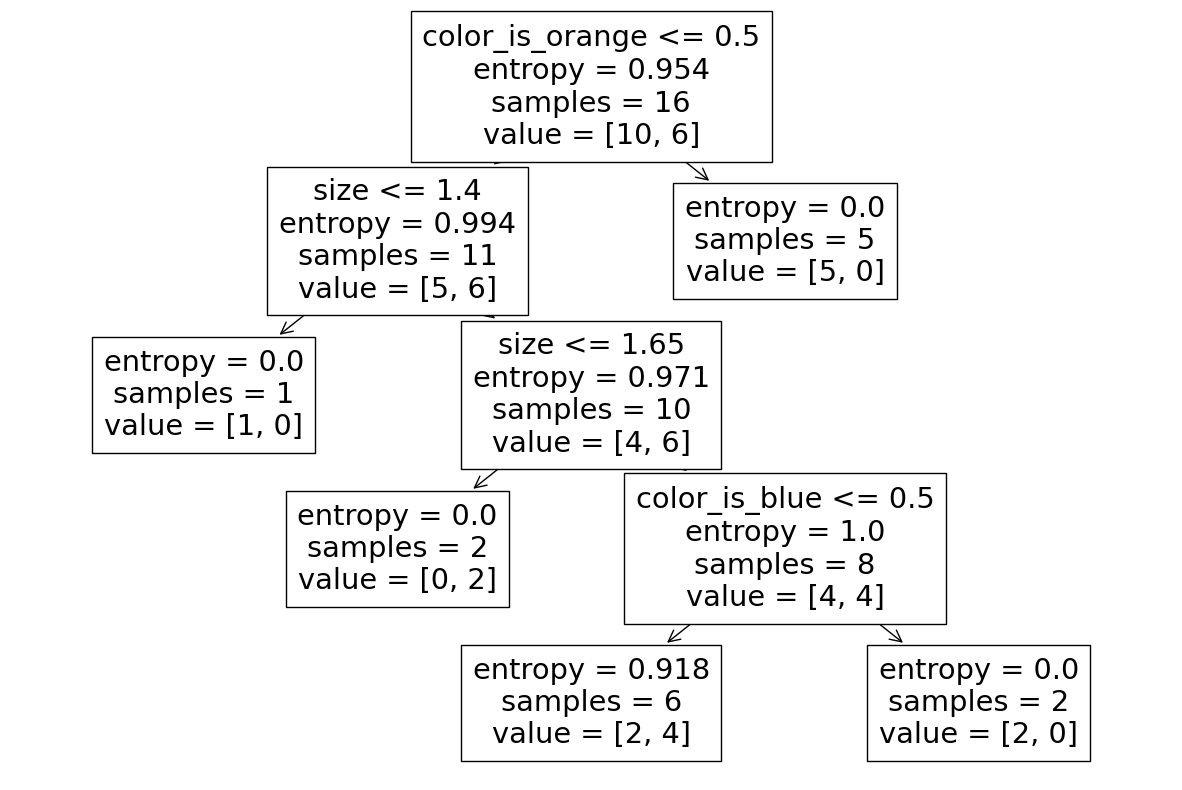

In [13]:
# Дерево в графическом виде
plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=X_columns)

In [14]:
print(export_text(tree, feature_names=X_columns))

|--- color_is_orange <= 0.50
|   |--- size <= 1.40
|   |   |--- class: 0
|   |--- size >  1.40
|   |   |--- size <= 1.65
|   |   |   |--- class: 1
|   |   |--- size >  1.65
|   |   |   |--- color_is_blue <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- color_is_blue >  0.50
|   |   |   |   |--- class: 0
|--- color_is_orange >  0.50
|   |--- class: 0



In [15]:
# какой признак насколько повлиял на принятие итогового решения
tree.feature_importances_

array([0.25511545, 0.        , 0.3006128 , 0.44427176, 0.        ])

## Теперь будем работать с нормальными данными

In [16]:
from sklearn.datasets import load_iris

In [17]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [18]:
data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
data['target'] = iris['target']
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
data = data[['sepal length (cm)', 'sepal width (cm)', 'target']]
data

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [20]:
k = 0.4
mask = (np.random.random(data.shape[0]) < k)

X_train = data[~mask][data.columns.drop(['target'])].values
y_train = data[~mask]['target'].values

X_test = data[mask][data.columns.drop(['target'])].values
y_test = data[mask]['target'].values

In [21]:
model = DecisionTreeClassifier(max_depth=None)
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred, normalize=True)

NameError: name 'y_pred' is not defined

#### Меняем *max_depth* и наблюдаем, как меняется разбиение плоскости предикатами
**большой max_depth** - переобучение

In [23]:
cmap = {name: i for i, name in enumerate(set(y_train))}

xx1 = np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100)
xx2 = np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 100)

x1_grid, x2_grid = np.meshgrid(xx1, xx2)
X_fit = [(x1, x2) for x1, x2 in zip(x1_grid.ravel(), x2_grid.ravel())]
X_fit = np.array(X_fit)

c_train = [cmap[y] for y in y_train]
y_fit = model.predict(X_fit)
c_fit = np.array([cmap[y] for y in y_fit]).reshape(100, 100)

In [24]:
c_test = [cmap[y] for y in y_test]

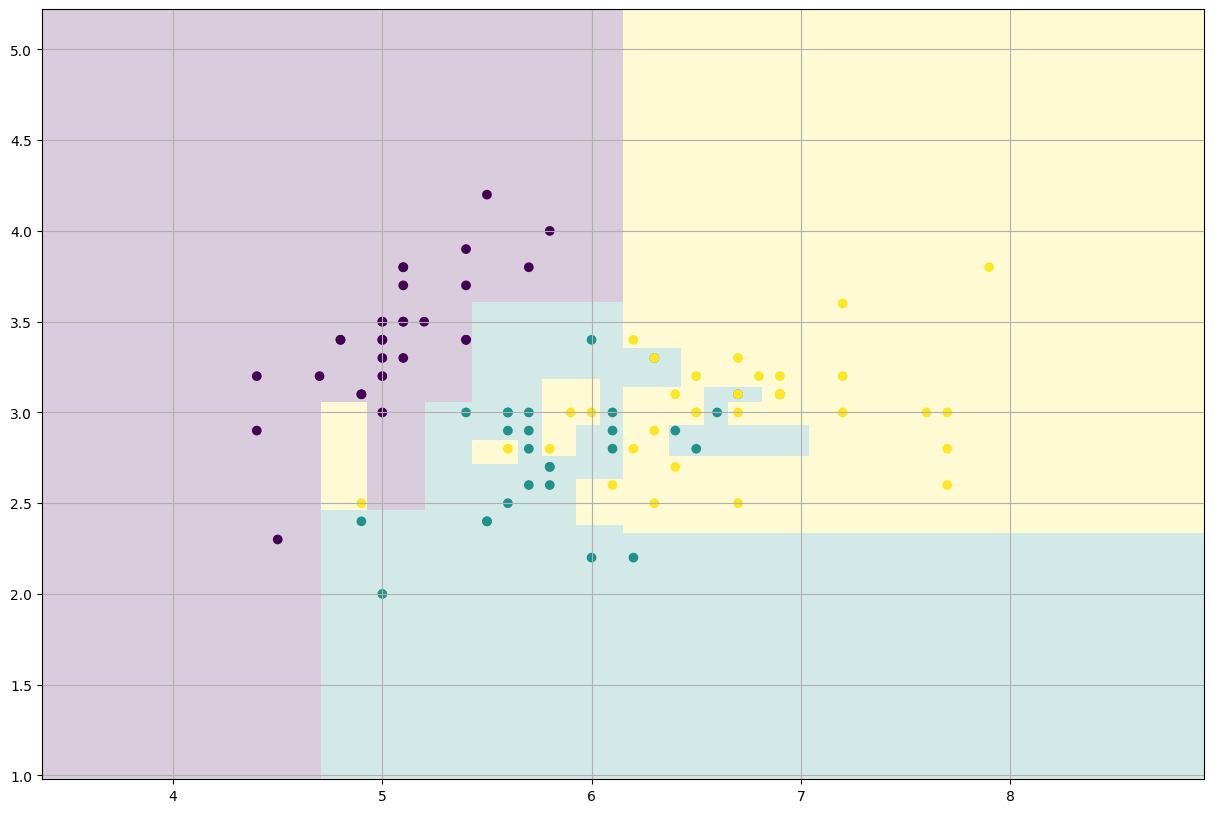

In [25]:
plt.figure(figsize=(15, 10))
plt.pcolormesh(xx1, xx2, c_fit, alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=c_train)
#plt.scatter(X_test[:, 0], X_test[:, 1], c=c_test) # Раскоментируйте, чтобы посмотреть, как ляжет test
plt.grid()

## Корреляции данных

In [30]:
data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
data['target'] = iris['target']
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [31]:
data['2 * sepal_length + 5'] = (
    2 * data['sepal length (cm)'] 
    + 5 
    + [random.gauss(0, 0.2) for i in data['sepal length (cm)']] # шум, распределённый нормально
)

NameError: name 'random' is not defined

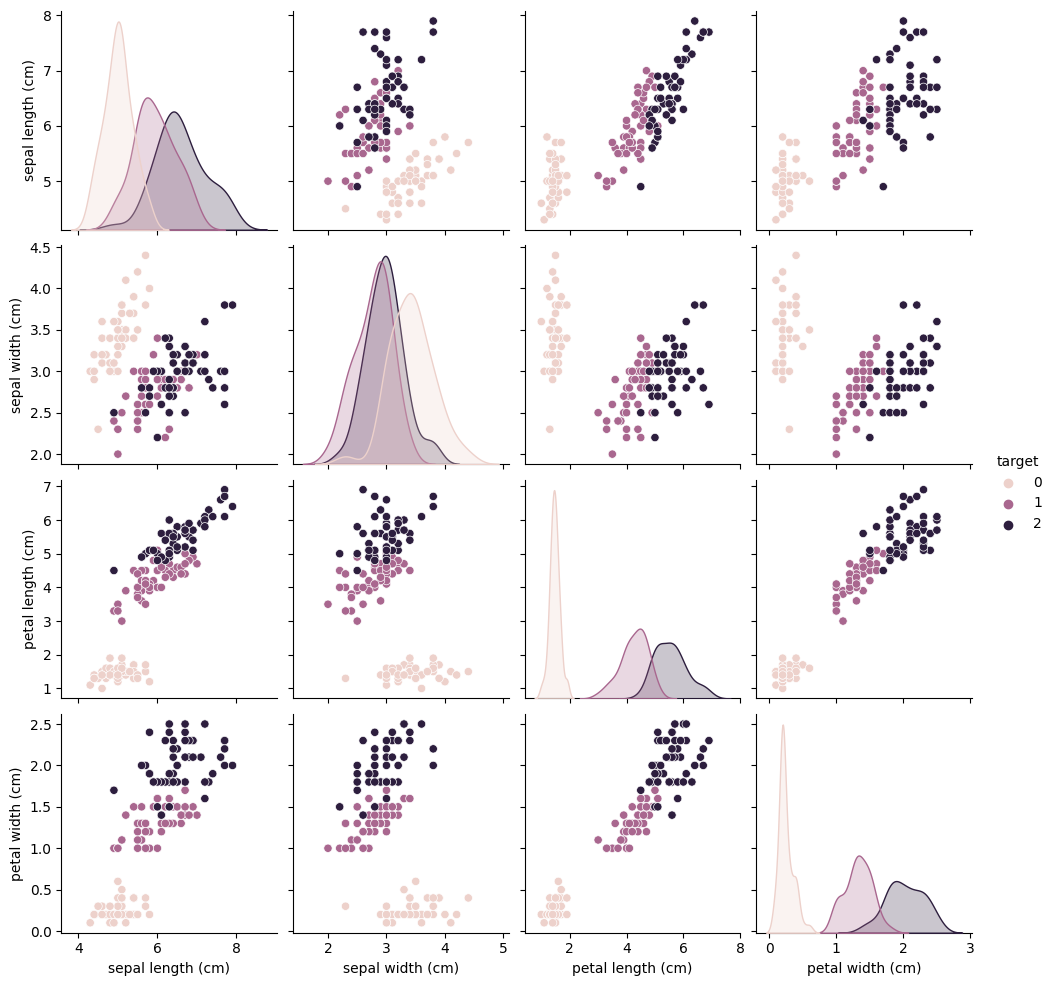

In [28]:
sns.pairplot(data, hue ='target')
plt.show()

In [29]:
# petal_length = sepal_length * a + b + шум - линейно коррелированы
# Коэффициент корреляции Пирсона (для непрерывных величин)
# Коэффициент корреляции Спирмена (для ранговых и количественных величин)
# Таблица сопряжённости (контингентности) (для номинальных)

# С таблицей сопряжённости используется точный тест Фишера

#### На что ориентироваться при выборе признаков
1. Графики
2. Реакция моделей на добавление признаков - как меняются метрики (accuracy) 
3. feature_importances_
4. Собственные гипотезы (но всё же желательно подтверждать чем-то из перечисленного выше)